**Belt Exam:**Version A: Intermediate ML

**Student Name:** Mwebaze Junior


Housing

Problem:

A house-flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices. They would like to segment homes into groups to analyze what kinds of homes there are. They would also like a model that predicts the selling price of a home.

The company has provided publicly available data from the King County Assessor's office to use for clustering and prediction.
Data notes:

BrickStone is the percentage of a house made of brick or stone.

**Part 1: Clustering instructions:**

The house-flipping company would like you to segment the homes sold in the database and create an analytical report on the clusters, describing each cluster and describing how they are different. The data has had some cleaning work performed on it, but you should verify that it is ready for clustering.

1.**Load this dataset for modeling**

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/option_A_clustering_df - option_A_clustering_df.csv'
df = pd.read_csv(filename)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


**check data set information**

In [191]:
# Check the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

**check data types**

In [192]:
# Check the data types of each column
df.dtypes

SalePrice               int64
SqFt1stFloor            int64
SqFtHalfFloor           int64
SqFt2ndFloor            int64
SqFtUpperFloor          int64
SqFtTotLiving           int64
SqFtTotBasement         int64
SqFtFinBasement         int64
SqFtGarageBasement      int64
SqFtGarageAttached      int64
DaylightBasement        int64
SqFtOpenPorch           int64
SqFtEnclosedPorch       int64
SqFtDeck                int64
BrickStone              int64
Bedrooms                int64
BathHalfCount           int64
Bath3qtrCount           int64
BathFullCount           int64
YrBuilt                 int64
Longitude             float64
Latitude              float64
dtype: object

check null values

In [193]:
# Check for missing values
df.isna().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

In [194]:
# Print the summary statistics of the data
df.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,6.643497e+05,1175.502832,51.758495,349.306837,26.994134,1935.205097,595.065939,334.273463,102.417071,170.282160,...,8.271238,148.908576,4.415858,3.375607,0.387743,0.628236,1.319579,1972.183455,-122.271891,47.572471
std,2.978080e+05,446.398643,174.464172,544.632918,115.331907,764.888792,567.175862,422.825946,187.119944,239.635895,...,37.449815,201.636086,18.643753,0.947061,0.506022,0.651598,0.609963,32.905503,0.086519,0.127187
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346573,47.488749
50%,6.305500e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1967.000000,-122.291976,47.576939
75%,7.886125e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,257.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2016.000000,-122.192528,47.681099
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


In [195]:
# Check for duplicate rows
df.duplicated().sum()

29

In [196]:
# Drop duplicate rows in df
df.drop_duplicates(inplace=True)

In [197]:
# Check for duplicate rows
df.duplicated().sum()

0

**Prepare the data for modeling**

In [198]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df)

# Transform the data using the scaler
df_scaled = scaler.transform(df)

**Use a KMeans model to cluster the houses into an optimal number of clusters.**

    1. Use an elbow plot and silhouette score to find the optimal number of clusters.
    2. There must be between 2 and 10 clusters.
    3. Explain your choice of the number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

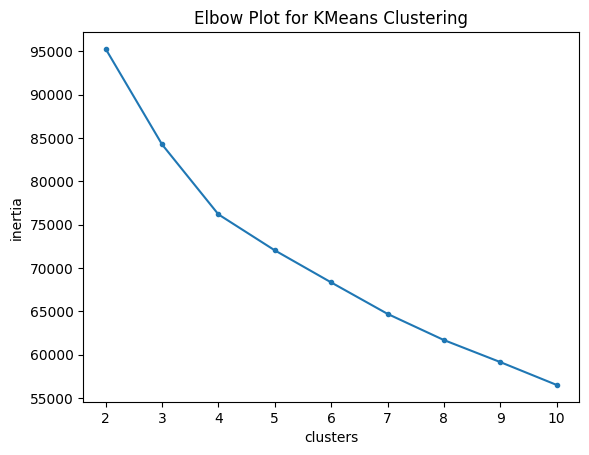

In [199]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.title("Elbow Plot for KMeans Clustering")
plt.ylabel('inertia');


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

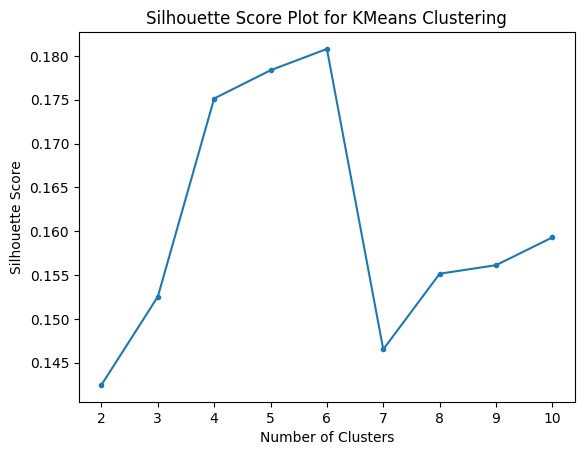

In [200]:
# Import Silhouette Score method
from sklearn.metrics import silhouette_score
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.title("Silhouette Score Plot for KMeans Clustering")
plt.ylabel('Silhouette Score');

**Visualization explaination**

**Based on the Elbow and silhouette score plot we above the following **

1. the optimal number of clusters is 3. This is the point where the silhouette score starts to level off, indicating that adding more clusters will not significantly improve the quality of the clustering.

2. the silhouette score increases rapidly as the number of clusters increases from 2 to 3. This indicates that adding more clusters is improving the quality of the clustering. However, the silhouette score starts to level off after 3 clusters. This indicates that adding more clusters will not significantly improve the quality of the clustering

3. Therefore, the optimal number of clusters is 3. This means that the houses can be best grouped into 3 distinct clusters based on their features.
4. Optimal number of clusters: 5

**Analyze and report on the clusters.**

    1. Create 2 report quality explanatory visualizations showing important differences between the clusters.
    2. Interpret and explain each visualization.

In [239]:
# Choose the optimal number of clusters (based on elbow plot and silhouette score)
optimal_clusters = 4

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [202]:
# Group by cluster to get the mean values
cluster_description = df.groupby('Cluster').mean()
cluster_description

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
Cluster,,,,,,,,,,,,,,,,,,,,,
0,800569.378238,1308.393782,129.222798,104.507772,10.310881,2074.663212,1030.466321,523.937824,135.233161,89.585492,...,4.766839,98.393782,92.979275,3.222798,0.352332,0.523316,1.176166,1947.637306,-122.313914,47.609316
1,699416.967352,562.315599,6.339782,557.292624,147.264813,1536.906892,374.007255,267.320435,102.137848,10.662636,...,16.070133,299.377267,0.000000,2.756953,0.530834,0.908102,1.240629,2015.915357,-122.332590,47.616170
2,701105.388093,1412.025622,24.296910,82.800301,0.000000,2324.215524,1229.103994,805.243406,243.906556,138.422758,...,6.053504,206.767898,1.555388,3.830445,0.403919,0.942728,1.316503,1965.336096,-122.250080,47.578438
3,529702.510753,1199.045699,91.982796,67.500000,0.000000,1435.270430,347.100538,81.279570,25.956989,159.265054,...,7.876344,67.243548,0.843011,3.027957,0.207527,0.286022,1.096237,1947.485484,-122.283790,47.554594
4,872449.639831,1375.221751,30.889831,1399.980226,9.307910,2962.275424,208.494350,147.621469,28.895480,471.535311,...,5.070621,90.925141,0.360169,4.227401,0.673729,0.632768,2.048023,2003.652542,-122.197298,47.546035


In [237]:
df.dtypes

SalePrice               int64
SqFt1stFloor            int64
SqFtHalfFloor           int64
SqFt2ndFloor            int64
SqFtUpperFloor          int64
SqFtTotLiving           int64
SqFtTotBasement         int64
SqFtFinBasement         int64
SqFtGarageBasement      int64
SqFtGarageAttached      int64
DaylightBasement        int64
SqFtOpenPorch           int64
SqFtEnclosedPorch       int64
SqFtDeck                int64
BrickStone              int64
Bedrooms                int64
BathHalfCount           int64
Bath3qtrCount           int64
BathFullCount           int64
YrBuilt                 int64
Longitude             float64
Latitude              float64
Cluster                 int32
dtype: object

A bar plot of Saleprice for clusters

<ipython-input-241-85d62ee0ce63>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='SalePrice', palette='Set1', ci=None)
<ipython-input-241-85d62ee0ce63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='SalePrice', palette='Set1', ci=None)


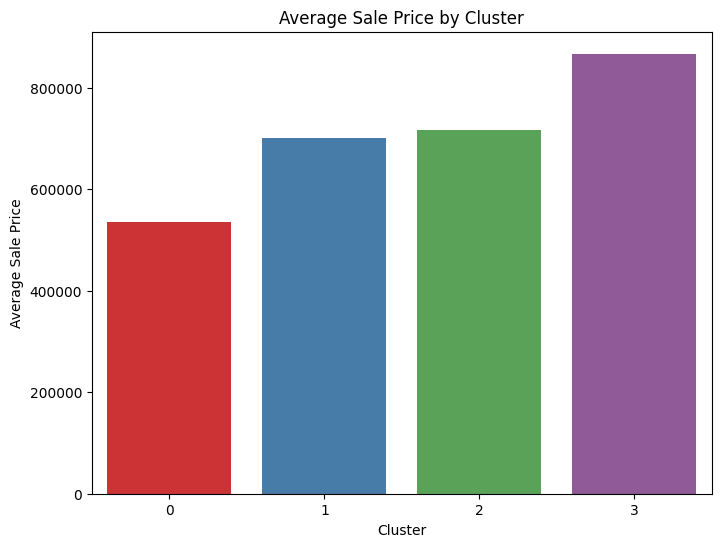

In [241]:
#barplot of cluster and saleprice
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Cluster', y='SalePrice', palette='Set1', ci=None)
plt.title('Average Sale Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sale Price')
plt.show()


### Interpretation
  - Cluster 0:
This cluster has homes with the lowest value. Factors contributing to this could include low square footage, old construction, undesirable locations, or other premium features.
  - Cluster 1 and 2
This cluster represents homes that are relatively expensive than 0. they might have much more desirable features.
- Cluster 3:
The homes here have a the highest sale price, they might be having more desirable features.

The plot scatter plot that shows the relationship between two variables: SqFtTotLiving (total living area) and SalePrice (sale price). Each data point on the plot represents a single house in the dataset, and the color of each data point indicates the cluster that the house belongs to.

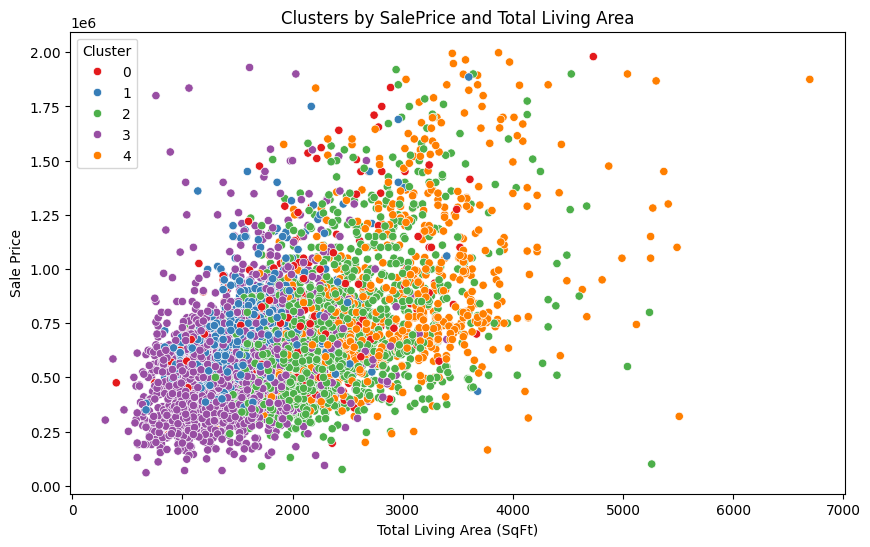

In [205]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SqFtTotLiving', y='SalePrice', hue='Cluster', palette='Set1')
plt.title('Clusters by SalePrice and Total Living Area')
plt.xlabel('Total Living Area (SqFt)')
plt.ylabel('Sale Price')
plt.show()


Observations:

There is a general positive correlation between total living area and sale price. This means that houses with larger total living areas tend to have higher sale prices.

However, there is also a lot of scatter in the data. This means that there are some houses with large total living areas that have low sale prices, and vice versa.

There is some separation between the clusters. For example, houses in cluster 0 tend to have lower total living areas and sale prices compared to houses in other clusters.

There are a few data points that are far away from the main cluster of data points. These data points represent houses that are either very large or very expensive, compared to the rest of the houses in the dataset.



Insights:

Cluster 0: Houses in this cluster tend to have the smallest total living areas and the lowest sale prices.

Cluster 1: Houses in this cluster have a wide range of total living areas and sale prices. However, they tend to have lower sale prices compared to other clusters.

Cluster 2: Houses in this cluster tend to have the largest total living areas and the highest sale prices.

Cluster 3: Houses in this cluster have a wide range of total living areas and sale prices. However, they tend to have higher sale prices compared to other clusters.

Overall:

The plot shows that there is a positive correlation between total living area and sale price, but this relationship varies across different clusters. This suggests that cluster membership is an important factor to consider when predicting sale price.

**Part 2: Modeling Instructions:**

The house flipping company has provided new data about when the homes were sold and what businesses are nearby. This new data has created a very large number of columns as the businesses, months sold, and years sold are all one-hot encoded.

They would like you to use this new dataset to create a deep-learning model that predicts the likely sale price for a new home coming to market.

Note: SalePrice is your target variable

**Load this dataset for modeling **

In [206]:

filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/option_A_modeling_df - option_A_modeling_df.csv'
df2 = pd.read_csv(filename)
df2.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [207]:
# Check the data frame info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [208]:
# Check the data types of each column
df2.dtypes

SalePrice         int64
SqFt1stFloor      int64
SqFtHalfFloor     int64
SqFt2ndFloor      int64
SqFtUpperFloor    int64
                  ...  
MonthSold_12      int64
YearSold_2017     int64
YearSold_2018     int64
YearSold_2019     int64
YearSold_2020     int64
Length: 171, dtype: object

In [209]:
# Check for missing values
df2.isna().sum()

SalePrice         0
SqFt1stFloor      0
SqFtHalfFloor     0
SqFt2ndFloor      0
SqFtUpperFloor    0
                 ..
MonthSold_12      0
YearSold_2017     0
YearSold_2018     0
YearSold_2019     0
YearSold_2020     0
Length: 171, dtype: int64

In [210]:
# Print the summary statistics of the data
df2.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
count,4.937000e+03,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,...,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,6.644969e+05,1176.440146,51.728378,348.925866,26.740531,1935.915333,595.723314,334.611708,102.511647,170.442576,...,0.082439,0.098440,0.087705,0.095605,0.091351,0.076767,0.246303,0.218756,0.270407,0.018230
std,2.979678e+05,445.949131,174.456092,544.743908,114.985746,764.987161,567.252633,422.990777,187.206721,239.709902,...,0.275060,0.297939,0.282894,0.294078,0.288137,0.266249,0.430901,0.413445,0.444215,0.133795
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.308000e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890000e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
# Check for duplicate rows
df2.duplicated().sum()

0

In [212]:
#define x, y
X = df2.drop(columns=['SalePrice'])
y = df2['SalePrice']

**Scale the Data**

In [213]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_scaled = scaler.fit_transform(X)

In [214]:
X_scaled.shape

(4937, 170)

In [215]:
y.shape

(4937,)

In [216]:
#train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Use PCA to prepare the data for modeling.**

In [217]:
from sklearn.decomposition import PCA

# Instantiate PCA with desired number of components
pca = PCA(n_components=50)
# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shape of the reduced data
print(X_train_pca.shape)
print(X_test_pca.shape)

(3949, 50)
(988, 50)


In [218]:
import tensorflow as tf

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [219]:
# Train the model
history1 = model.fit(X_train_pca, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50
99/99 [==============================] - 1s 4ms/step - loss: 527861874688.0000 - mae: 664294.8125 - val_loss: 550070845440.0000 - val_mae: 671139.8750
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 527508209664.0000 - mae: 664053.6875 - val_loss: 549368365056.0000 - val_mae: 670680.9375
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 526232911872.0000 - mae: 663226.5000 - val_loss: 547367845888.0000 - val_mae: 669425.6875
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 523238703104.0000 - mae: 661343.4375 - val_loss: 543233933312.0000 - val_mae: 666894.0000
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 517744066560.0000 - mae: 657922.8125 - val_loss: 536262737920.0000 - val_mae: 662673.8125
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 509139419136.0000 - mae: 652627.1875 - val_loss: 525940031488.0000 - val_mae: 656447.1250
Epoch 7/50
99/99 [==========

In [220]:
# Evaluate the model
loss, mae = model.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model.predict(X_test_pca)

31/31 [==============================] - 0s 2ms/step - loss: 47333302272.0000 - mae: 154328.9531
Test loss: 47333302272.0
Test MAE: 154328.953125
31/31 [==============================] - 0s 2ms/step


**Model1 has  only one hidden layer and no regularization.**

In [242]:
from tensorflow.keras import layers
# Define the model
model1 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [222]:
history1 = model1.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss1, mae1 = model1.evaluate(X_test_pca, y_test)

Epoch 1/64
99/99 [==============================] - 1s 6ms/step - loss: 527898673152.0000 - mae: 664321.6875 - val_loss: 550191628288.0000 - val_mae: 671224.4375
Epoch 2/64
99/99 [==============================] - 0s 4ms/step - loss: 527890317312.0000 - mae: 664316.1250 - val_loss: 550181601280.0000 - val_mae: 671217.8125
Epoch 3/64
99/99 [==============================] - 0s 4ms/step - loss: 527877144576.0000 - mae: 664307.6875 - val_loss: 550165544960.0000 - val_mae: 671207.6250
Epoch 4/64
99/99 [==============================] - 0s 4ms/step - loss: 527856992256.0000 - mae: 664294.6875 - val_loss: 550141362176.0000 - val_mae: 671192.6875
Epoch 5/64
99/99 [==============================] - 0s 4ms/step - loss: 527828582400.0000 - mae: 664276.8750 - val_loss: 550108528640.0000 - val_mae: 671172.8750
Epoch 6/64
99/99 [==============================] - 0s 4ms/step - loss: 527790505984.0000 - mae: 664253.6875 - val_loss: 550066388992.0000 - val_mae: 671147.6250
Epoch 7/64
99/99 [==========

In [223]:
# Evaluate the model
loss, mae = model1.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model.predict(X_test_pca)

31/31 [==============================] - 0s 1ms/step - loss: 508917645312.0000 - mae: 651854.5000
Test loss: 508917645312.0
Test MAE: 651854.5
31/31 [==============================] - 0s 2ms/step


**Model2 adds two hidden layers and Batch Normalization to address the potential issue of overfitting.**

In [224]:
model2 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [225]:
history2 = model2.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss2, mae2 = model2.evaluate(X_test_pca, y_test)

Epoch 1/64
99/99 [==============================] - 2s 5ms/step - loss: 527899983872.0000 - mae: 664323.1875 - val_loss: 550193332224.0000 - val_mae: 671226.9375
Epoch 2/64
99/99 [==============================] - 0s 3ms/step - loss: 527894609920.0000 - mae: 664321.5625 - val_loss: 550185664512.0000 - val_mae: 671225.3750
Epoch 3/64
99/99 [==============================] - 0s 3ms/step - loss: 527886581760.0000 - mae: 664318.3125 - val_loss: 550177144832.0000 - val_mae: 671222.3125
Epoch 4/64
99/99 [==============================] - 0s 3ms/step - loss: 527875997696.0000 - mae: 664313.6875 - val_loss: 550166528000.0000 - val_mae: 671217.8750
Epoch 5/64
99/99 [==============================] - 0s 3ms/step - loss: 527862661120.0000 - mae: 664307.7500 - val_loss: 550152241152.0000 - val_mae: 671211.5625
Epoch 6/64
99/99 [==============================] - 0s 4ms/step - loss: 527846506496.0000 - mae: 664300.0625 - val_loss: 550135332864.0000 - val_mae: 671203.9375
Epoch 7/64
99/99 [==========

In [226]:
# Evaluate the model
loss, mae = model2.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model2.predict(X_test_pca)

31/31 [==============================] - 0s 2ms/step - loss: 518343852032.0000 - mae: 657509.6250
Test loss: 518343852032.0
Test MAE: 657509.625
31/31 [==============================] - 0s 2ms/step


**Model3 adds L2 regularization to the hidden layers to further prevent overfitting. L2 regularization penalizes large weights, which can help to prevent the model from learning too complex a function and overfitting to the training data.**

In [227]:
model3 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train_pca.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(1)
])

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [228]:
history3 = model3.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss3, mae3 = model3.evaluate(X_test_pca, y_test)

Epoch 1/64
99/99 [==============================] - 2s 5ms/step - loss: 527899525120.0000 - mae: 664323.1250 - val_loss: 550192414720.0000 - val_mae: 671226.8750
Epoch 2/64
99/99 [==============================] - 0s 3ms/step - loss: 527893889024.0000 - mae: 664321.3125 - val_loss: 550182912000.0000 - val_mae: 671223.8750
Epoch 3/64
99/99 [==============================] - 0s 3ms/step - loss: 527886155776.0000 - mae: 664318.1250 - val_loss: 550172884992.0000 - val_mae: 671219.6250
Epoch 4/64
99/99 [==============================] - 0s 3ms/step - loss: 527875571712.0000 - mae: 664313.7500 - val_loss: 550162137088.0000 - val_mae: 671215.2500
Epoch 5/64
99/99 [==============================] - 0s 4ms/step - loss: 527862562816.0000 - mae: 664307.5000 - val_loss: 550149554176.0000 - val_mae: 671209.9375
Epoch 6/64
99/99 [==============================] - 0s 4ms/step - loss: 527846375424.0000 - mae: 664300.1250 - val_loss: 550132514816.0000 - val_mae: 671202.1250
Epoch 7/64
99/99 [==========

In [229]:
# Evaluate the model
loss, mae = model3.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model3.predict(X_test_pca)

31/31 [==============================] - 0s 2ms/step - loss: 518378258432.0000 - mae: 657506.3750
Test loss: 518378258432.0
Test MAE: 657506.375
31/31 [==============================] - 0s 2ms/step


**Choose a final model and justify your choice**

In [230]:
# Evaluate the model
loss, mae = model1.evaluate(X_test_pca, y_test)
print('Model 1 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model1.predict(X_test_pca)

31/31 [==============================] - 0s 2ms/step - loss: 508917645312.0000 - mae: 651854.5000
Model 1 results:
Test loss: 508917645312.0
Test MAE: 651854.5
31/31 [==============================] - 0s 1ms/step


In [231]:
# Evaluate the model
loss, mae = model2.evaluate(X_test_pca, y_test)
print('Model 2 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model2.predict(X_test_pca)

31/31 [==============================] - 0s 2ms/step - loss: 518343852032.0000 - mae: 657509.6250
Model 2 results:
Test loss: 518343852032.0
Test MAE: 657509.625
31/31 [==============================] - 0s 2ms/step


In [232]:
# Evaluate the model
loss, mae = model3.evaluate(X_test_pca, y_test)
print('Model 3 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model3.predict(X_test_pca)

31/31 [==============================] - 0s 2ms/step - loss: 518378258432.0000 - mae: 657506.3750
Model 3 results:
Test loss: 518378258432.0
Test MAE: 657506.375
31/31 [==============================] - 0s 2ms/step


In [233]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),

    }

    return metrics

# Evaluate each model
metrics1 = evaluate_model(model1, X_train_pca, y_train, X_test_pca, y_test)
metrics2 = evaluate_model(model2, X_train_pca, y_train, X_test_pca, y_test)
metrics3 = evaluate_model(model3, X_train_pca, y_train, X_test_pca, y_test)

print('Model 1 Metrics:', metrics1)
print('Model 2 Metrics:', metrics2)
print('Model 3 Metrics:', metrics3)


31/31 [==============================] - 0s 2ms/step
Model 1 Metrics: {'Train MAE': 657689.7641709279, 'Test MAE': 651854.4857005407, 'Train MSE': 518431818987.76117, 'Test MSE': 508917665719.7749, 'Train R2': -4.812089711756343, 'Test R2': -4.848896002698534}
Model 2 Metrics: {'Train MAE': 663521.02710251, 'Test MAE': 657509.6243132512, 'Train MSE': 528129980070.4505, 'Test MSE': 518343893585.1775, 'Train R2': -4.920814871338003, 'Test R2': -4.957229884967098}
Model 3 Metrics: {'Train MAE': 663508.6215129904, 'Test MAE': 657506.3691416617, 'Train MSE': 528148256784.9953, 'Test MSE': 518378194929.08905, 'Train R2': -4.92101976984284, 'Test R2': -4.957624103927856}


** Oberving the model results of the above three models, I choose MODEL1 looking its  **Test Loss of 508327231488.0**,
**Test MAE: 651469.1875**  and **Rsquared value** being lower than that of MODEL2 and MODEL3 **

**Evaluate your final model with multiple metrics**

In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
       'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),

    }

    return metrics

# Evaluate  model1
metrics1 = evaluate_model(model1, X_train_pca, y_train, X_test_pca, y_test)

print('Model 1 Metrics:', metrics1)

31/31 [==============================] - 0s 1ms/step
Model 1 Metrics: {'Train MAE': 657689.7641709279, 'Test MAE': 651854.4857005407, 'Train MSE': 518431818987.76117, 'Test MSE': 508917665719.7749, 'Train R2': -4.812089711756343, 'Test R2': -4.848896002698534}


In [235]:
# Evaluate the model
loss, mae = model1.evaluate(X_test_pca, y_test)
print('Model 1 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions_model1 = model1.predict(X_test_pca)

# Evaluate the model
loss, mae = model2.evaluate(X_test_pca, y_test)
print('Model 2 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions_model2 = model2.predict(X_test_pca)

# Evaluate the model
loss, mae = model3.evaluate(X_test_pca, y_test)
print('Model 3 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions_model3 = model3.predict(X_test_pca)

31/31 [==============================] - 0s 1ms/step - loss: 508917645312.0000 - mae: 651854.5000
Model 1 results:
Test loss: 508917645312.0
Test MAE: 651854.5
31/31 [==============================] - 0s 2ms/step - loss: 518343852032.0000 - mae: 657509.6250
Model 2 results:
Test loss: 518343852032.0
Test MAE: 657509.625
31/31 [==============================] - 0s 2ms/step - loss: 518378258432.0000 - mae: 657506.3750
Model 3 results:
Test loss: 518378258432.0
Test MAE: 657506.375
31/31 [==============================] - 0s 2ms/step
